In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay,precision_score,recall_score, RocCurveDisplay,PrecisionRecallDisplay

In [2]:
df = pd.read_csv('hearing_test.csv')

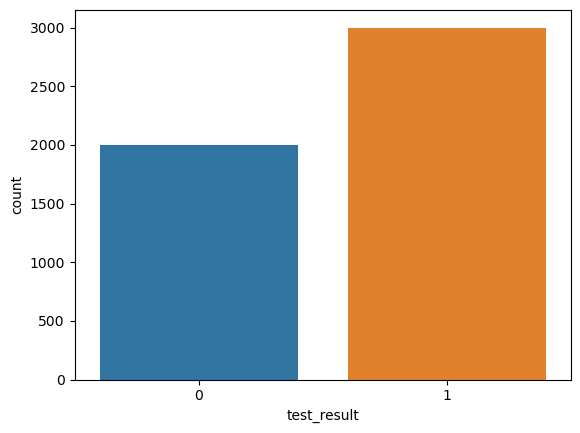

In [3]:
sns.countplot(x='test_result', data=df);

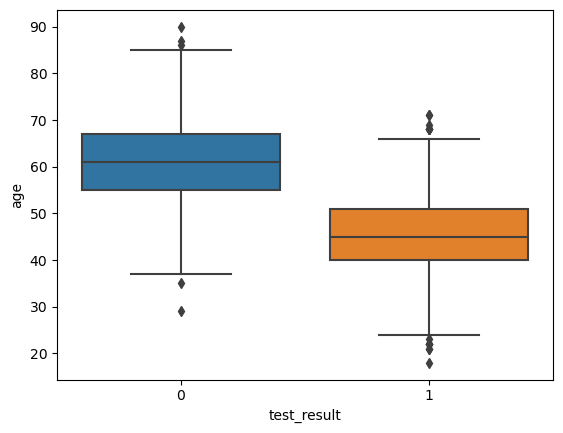

In [4]:
plt.figure(dpi=100)
sns.boxplot(x='test_result', y='age', data=df);

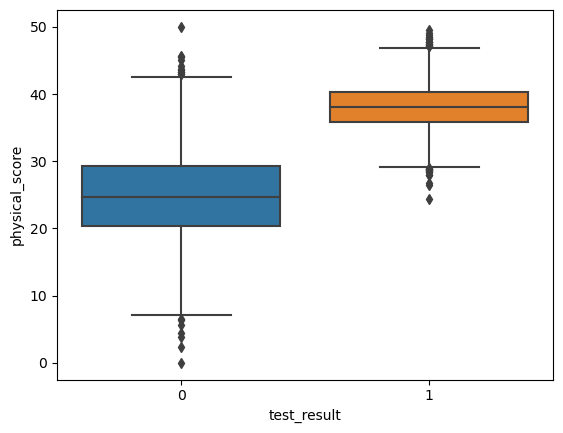

In [5]:
plt.figure(dpi=100)
sns.boxplot(x='test_result', y='physical_score', data=df);

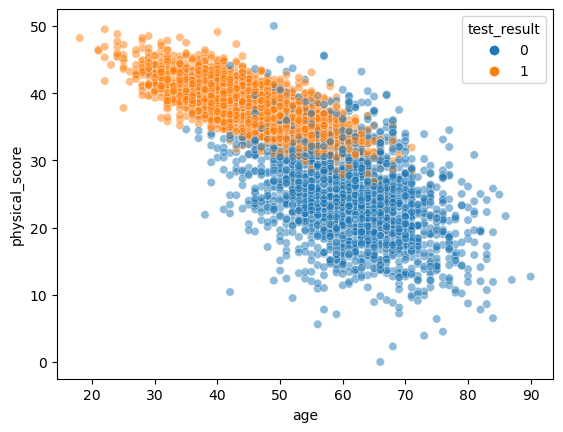

In [6]:
sns.scatterplot(x='age', y='physical_score', hue='test_result', data=df, alpha=0.5);

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


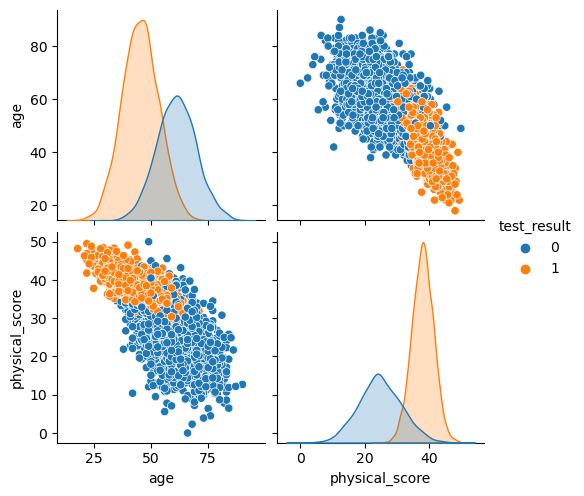

In [7]:
sns.pairplot(df, hue='test_result');

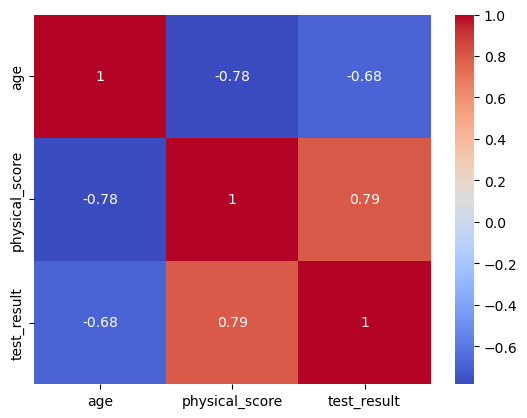

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

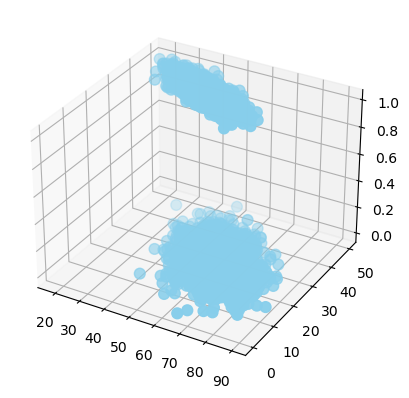

In [9]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c='skyblue', s=60);

In [10]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
log_model = LogisticRegression()

In [15]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [16]:
y_pred = log_model.predict(scaled_X_test)

In [17]:
y_pred_proba = log_model.predict_proba(scaled_X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9053333333333333

In [19]:
confusion_matrix(y_test, y_pred)

array([[525,  84],
       [ 58, 833]], dtype=int64)

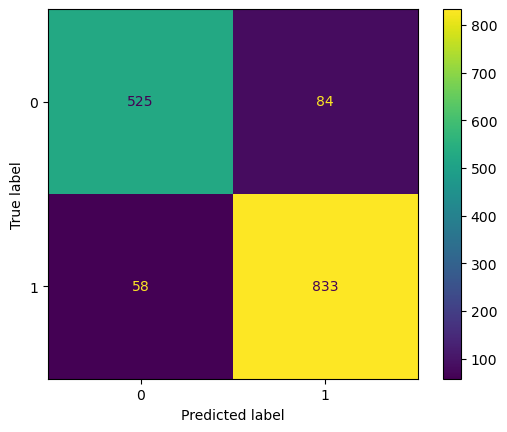

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=log_model.classes_).plot();

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       609
           1       0.91      0.93      0.92       891

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.90      1500



In [25]:
precision_score(y_test, y_pred)

0.9083969465648855

In [26]:
recall_score(y_test, y_pred)

0.9349046015712682

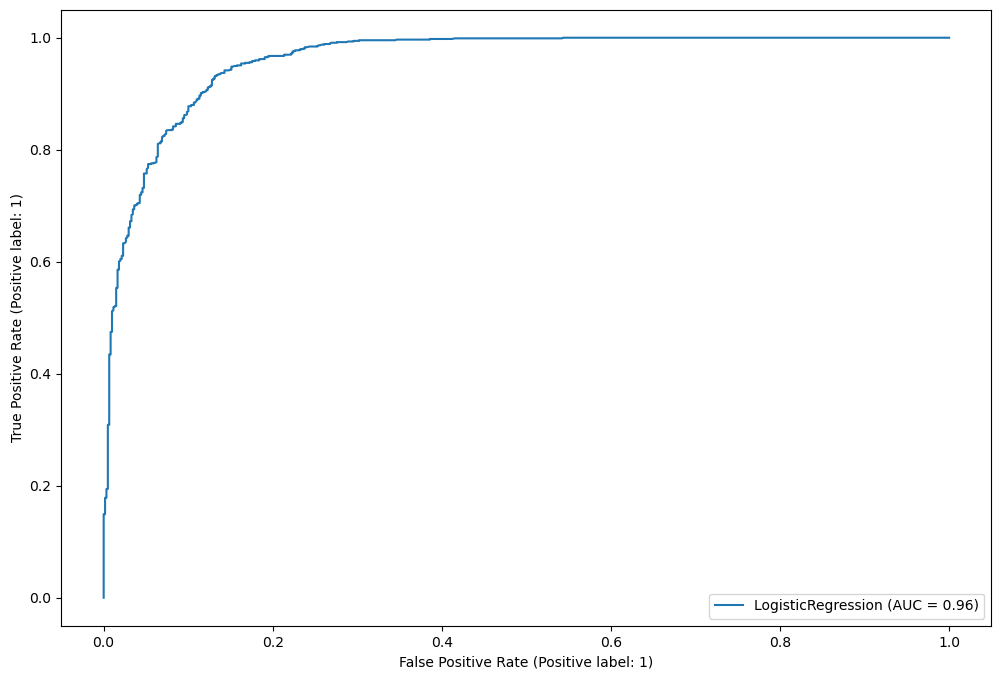

In [31]:
fig, ax = plt.subplots(figsize=(12,8),dpi=100)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test,ax=ax);

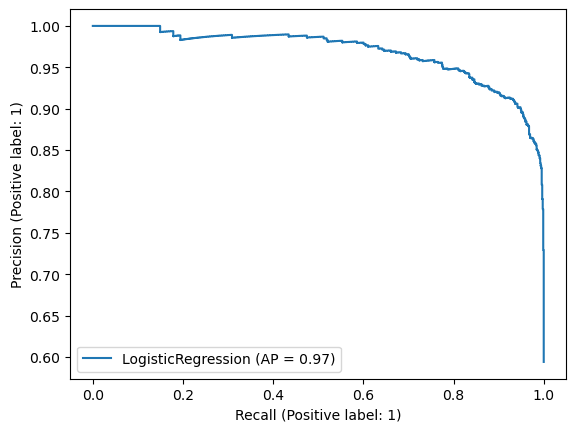

In [33]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test);